# Import the necessary libraries 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
plt.style.use("fivethirtyeight")

# Load the dataset in Pandas DataFrame

In [4]:
df = pd.read_csv("customers_info.csv")
df.head()

,CustomerID,Gender,Age,Items Purchased,Category,Purchase Amount,Shipping Type,Profession,Subscription Status,Season,Country
0,1,Male,18,Blouse,Clothing,50,Express,Healthcare,Yes,Spring,United States
1,2,Male,20,Sweater,Clothing,25,Free Shipping,Engineer,No,Summer,United States
2,3,Female,35,Jeans,Clothing,15,Next Day Air,Engineer,Yes,Fall,United States
3,4,Female,45,Sandals,Footwear,69,2-Day Shipping,Lawyer,No,Winter,United States
4,5,Female,60,Blouse,Clothing,85,2-Day Shipping,Entertainment,Yes,Winter,United States


In [5]:
df.tail()

,CustomerID,Gender,Age,Items Purchased,Category,Purchase Amount,Shipping Type,Profession,Subscription Status,Season,Country
2000,1996,Female,22,Boots,Footwear,45,Express,Artist,Yes,Summer,United States
2001,1997,Female,22,Boots,Footwear,77,Free Shipping,Doctor,Yes,Summer,Brazil
2002,1998,Male,22,Boots,Footwear,50,Next Day Air,Healthcare,Yes,Summer,United States
2003,1999,Male,22,Boots,Footwear,25,Express,Executive,Yes,Summer,Brazil
2004,2000,Male,22,Boots,Footwear,15,Free Shipping,Entertainment,Yes,Summer,United States


In [6]:
df.shape

(2005, 11)

In [7]:
print("The number of rows", df.shape[0])
print("The number of columns", df.shape[1])

The number of rows 2005
The number of columns 11


In [8]:
# Checking the missing values in dataset

print("Missing value?", df.isnull().values.any())

Missing value? True


In [9]:
df.isnull().sum()

CustomerID              0
Gender                  0
Age                     0
Items Purchased         0
Category                0
Purchase Amount         0
Shipping Type           0
Profession             35
Subscription Status     0
Season                 29
Country                 0
dtype: int64

In [10]:
# Finding the % of missing value by creating variable 
per_missing = df.isnull().sum() * 100 / len(df)

per_missing

CustomerID             0.000000
Gender                 0.000000
Age                    0.000000
Items Purchased        0.000000
Category               0.000000
Purchase Amount        0.000000
Shipping Type          0.000000
Profession             1.745636
Subscription Status    0.000000
Season                 1.446384
Country                0.000000
dtype: float64

In [11]:
# Removing the missing values from dataset
df.dropna(axis=0,inplace= True)

In [12]:
# Check for the Duplicate Data
df.duplicated().any() # Since the data contain any duplicate value

True

In [13]:
# To drop the duplicate data value 
df.drop_duplicates(inplace=True)

In [14]:
# Standardize 'Country' entries (correct "United states")
df['Country'] = df['Country'].str.strip().str.title()


In [15]:
# Overall statistics of DataFrame of the dataset
df.describe()

,CustomerID,Age,Purchase Amount
count,1941.000000,1941.000000,1941.000000
mean,1010.755281,29.476558,52.460587
std,574.245961,13.068262,29.359856
min,1.000000,18.000000,12.000000
25%,517.000000,22.000000,23.000000
50%,1013.000000,22.000000,50.000000
75%,1509.000000,33.000000,77.000000
max,2000.000000,74.000000,100.000000


In [16]:
# Removing the unwanted column
df.drop('Profession', axis=1, inplace=True, errors='ignore')

In [17]:
# Verifying  the drop column 
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1941 entries, 0 to 2004
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   CustomerID           1941 non-null   int64 
 1   Gender               1941 non-null   object
 2   Age                  1941 non-null   int64 
 3   Items Purchased      1941 non-null   object
 4   Category             1941 non-null   object
 5   Purchase Amount      1941 non-null   int64 
 6   Shipping Type        1941 non-null   object
 7   Subscription Status  1941 non-null   object
 8   Season               1941 non-null   object
 9   Country              1941 non-null   object
dtypes: int64(3), object(7)
memory usage: 166.8+ KB


In [18]:
# Defining the age_group from Age column
def age_groups(age):
    if age < 18:
        return 'Under 18'
    elif age >= 65:
        return '65+'
    elif age >= 18 and age < 25:
        return '18-24'
    elif age >= 25 and age < 35:
        return '25-34'
    elif age >= 35 and age < 45:
        return '35-44'
    elif age >= 45 and age < 55:
        return '45-54'
    else:
        return '55-64'

# Create age groups
df['Age_Group'] = df['Age'].apply(age_groups)

In [19]:
df.head()

,CustomerID,Gender,Age,Items Purchased,Category,Purchase Amount,Shipping Type,Subscription Status,Season,Country,Age_Group
0,1,Male,18,Blouse,Clothing,50,Express,Yes,Spring,United States,18-24
1,2,Male,20,Sweater,Clothing,25,Free Shipping,No,Summer,United States,18-24
2,3,Female,35,Jeans,Clothing,15,Next Day Air,Yes,Fall,United States,35-44
3,4,Female,45,Sandals,Footwear,69,2-Day Shipping,No,Winter,United States,45-54
4,5,Female,60,Blouse,Clothing,85,2-Day Shipping,Yes,Winter,United States,55-64


In [20]:
# Gender-wise analysis
gender_group = df.groupby('Gender')['Purchase Amount'].mean()

gender_group

Gender
Female    52.699567
Male      52.109415
Name: Purchase Amount, dtype: float64

In [21]:
# Category-wise analysis
category_group = df.groupby('Category')['Purchase Amount'].mean()

category_group

Category
Accessories    49.485149
Clothing       52.700084
Footwear       53.028391
Outerwear      53.057778
Name: Purchase Amount, dtype: float64

In [22]:
# Season-wise analysis
season_group = df.groupby('Season')['Purchase Amount'].mean()

season_group

Season
Fall      52.931507
Spring    52.603383
Summer    52.373206
Winter    52.382228
Name: Purchase Amount, dtype: float64

In [23]:
# Country-wise analysis
country_group = df.groupby('Country')['Purchase Amount'].mean()

country_group

Country
Afghanistan      52.843407
Albania          52.826996
Algeria          46.727273
Argentina        47.454545
Australia        52.556452
Brazil           56.816667
France           51.962963
Pakistan         42.937500
Turkey           49.710526
United States    50.541667
Name: Purchase Amount, dtype: float64

# Data Visualization 

In [25]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Items Purchased', 'Category',
       'Purchase Amount', 'Shipping Type', 'Subscription Status', 'Season',
       'Country', 'Age_Group'],
      dtype='object')

In [26]:
gender_counts = df['Gender'].value_counts()

gender_counts

Gender
Female    1155
Male       786
Name: count, dtype: int64

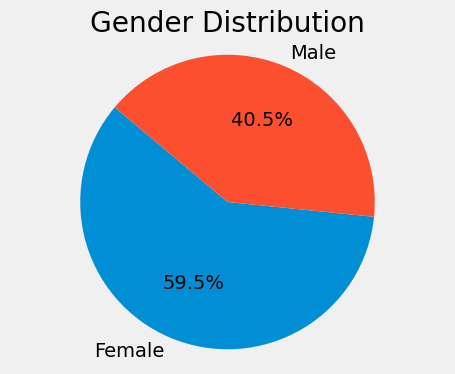

In [27]:
# Gender Distribution 
plt.figure(figsize=(5, 4))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Gender Distribution') 
plt.axis('equal')  
plt.show()

In [28]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Items Purchased', 'Category',
       'Purchase Amount', 'Shipping Type', 'Subscription Status', 'Season',
       'Country', 'Age_Group'],
      dtype='object')

In [29]:
gender_group = df.groupby('Gender')['Purchase Amount'].mean().sort_index()

gender_group_df = gender_group.reset_index() 

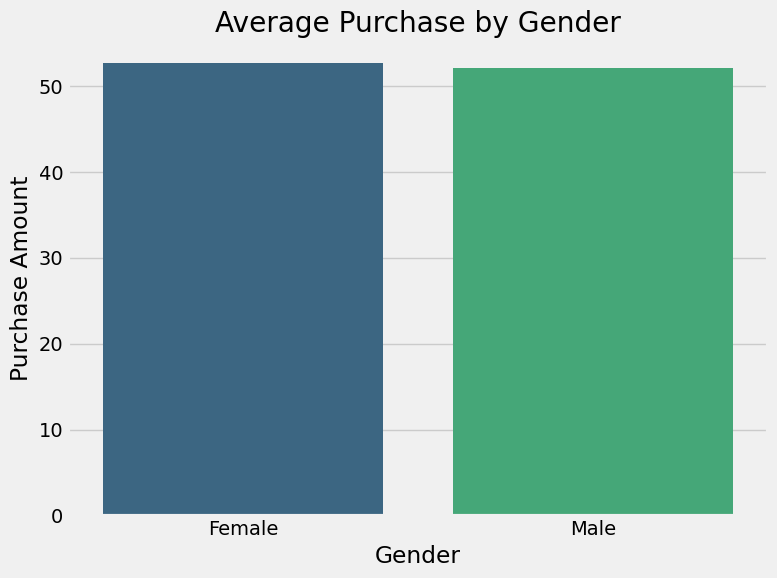

In [30]:
# Average Purchase by Gender
plt.figure(figsize=(8, 6)) 
sns.barplot(x='Gender', y='Purchase Amount', data=gender_group_df, palette='viridis') 
plt.title("Average Purchase by Gender")
plt.tight_layout()
plt.show()

In [31]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Items Purchased', 'Category',
       'Purchase Amount', 'Shipping Type', 'Subscription Status', 'Season',
       'Country', 'Age_Group'],
      dtype='object')

In [32]:
category_group = df.groupby('Category')['Purchase Amount'].mean().sort_index()

category_group_df = category_group.reset_index() 

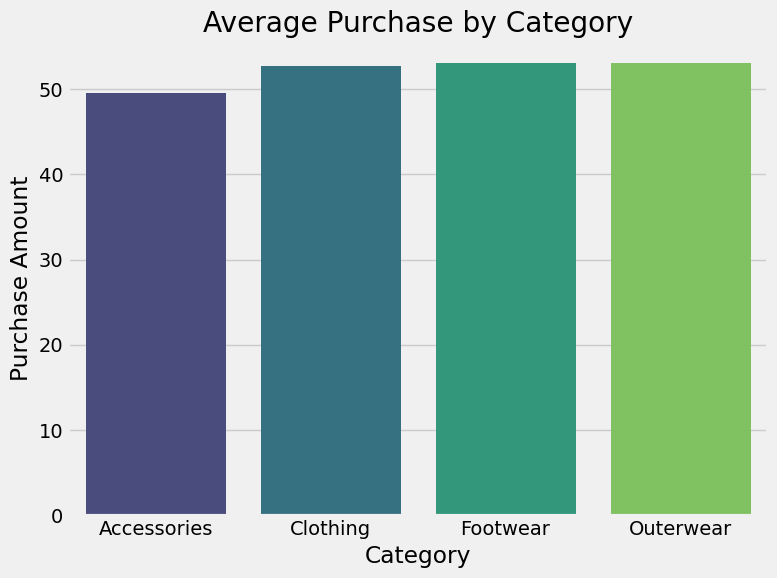

In [33]:
# Average Purchase by Category
plt.figure(figsize=(8, 6)) 
sns.barplot(x='Category', y='Purchase Amount', data=category_group_df, palette='viridis') 
plt.title("Average Purchase by Category")
plt.tight_layout()
plt.show()

In [34]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Items Purchased', 'Category',
       'Purchase Amount', 'Shipping Type', 'Subscription Status', 'Season',
       'Country', 'Age_Group'],
      dtype='object')

In [35]:
season_group = df.groupby('Season')['Purchase Amount'].mean().sort_index()
season_group_df = season_group.reset_index()

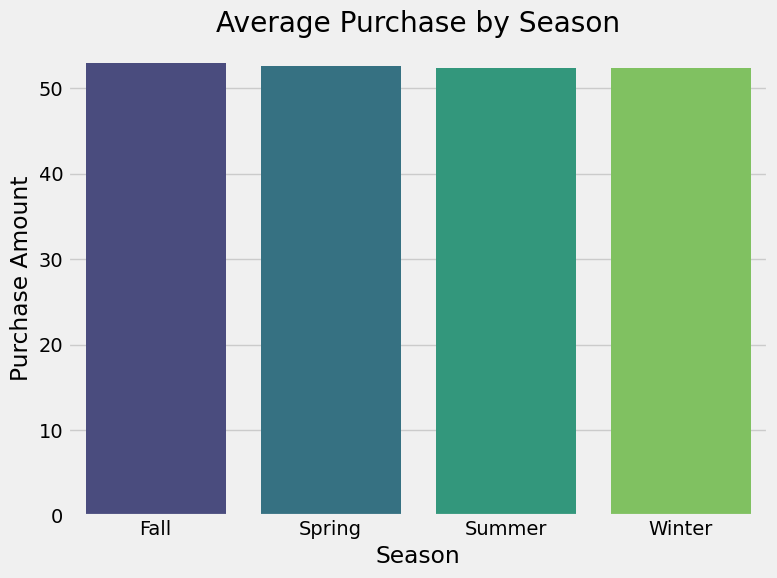

In [36]:
# Average Purchase by Season 
plt.figure(figsize=(8, 6)) 
sns.barplot(x='Season', y='Purchase Amount', data=season_group_df, palette='viridis') 
plt.title("Average Purchase by Season")
plt.tight_layout()
plt.show()

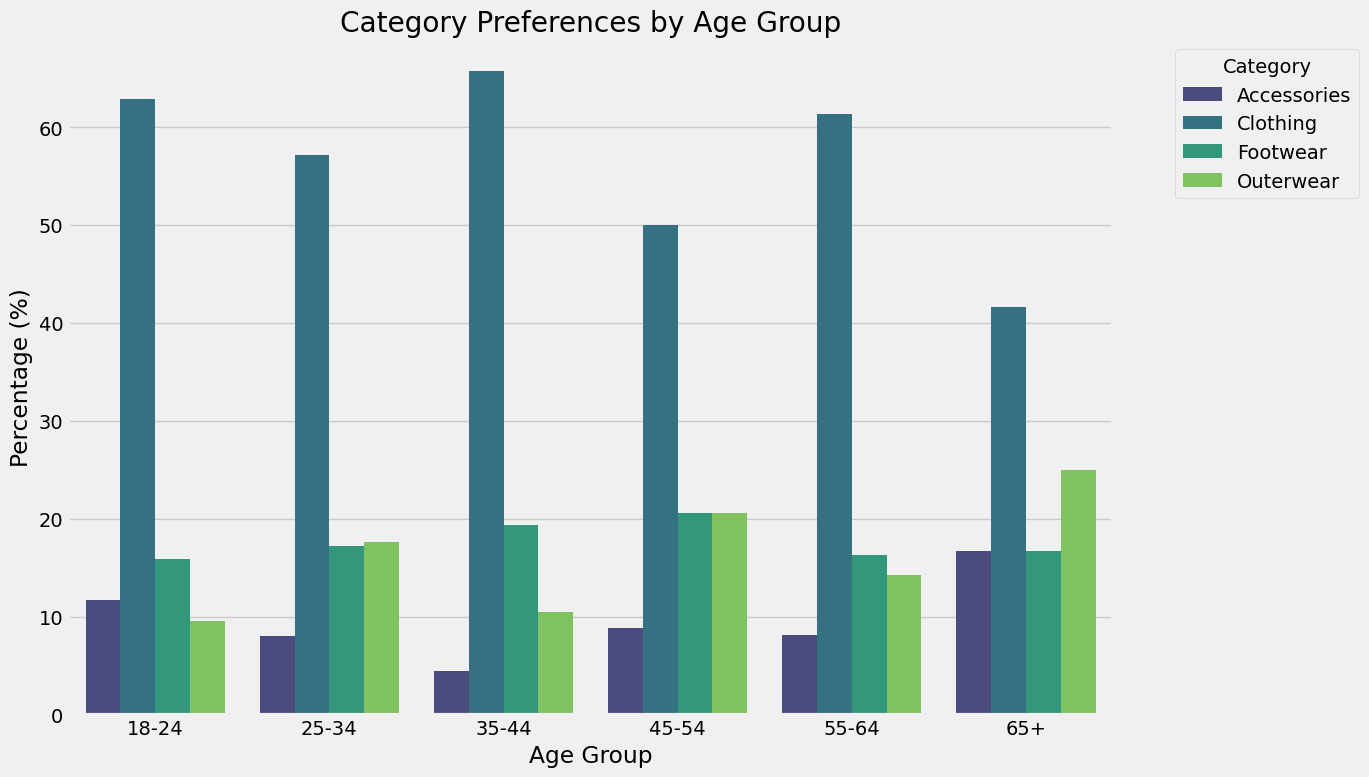

In [37]:
# Category preference by age group
category_by_age = pd.crosstab(df['Age_Group'], df['Category'], normalize='index') * 100
category_by_age_df = category_by_age.reset_index().melt(id_vars='Age_Group', var_name='Category', value_name='Percentage') 
plt.figure(figsize=(14, 8)) 
sns.barplot(x='Age_Group', y='Percentage', hue='Category', data=category_by_age_df, palette='viridis') 
plt.title('Category Preferences by Age Group') 
plt.xlabel('Age Group') 
plt.ylabel('Percentage (%)') 
plt.legend(title='Category', bbox_to_anchor=(1.05, 1), loc='upper left') 
plt.tight_layout() 
plt.show()

<Figure size 1200x600 with 0 Axes>

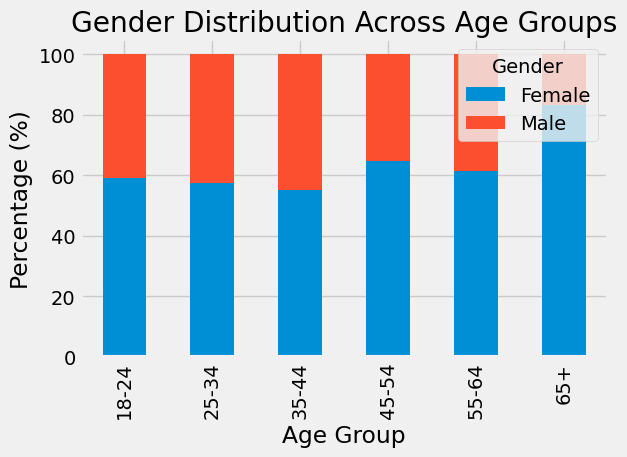

In [38]:
# Gender distribution by Age_Groups
plt.figure(figsize=(12, 6))
gender_age = pd.crosstab(df['Age_Group'], df['Gender'], normalize='index') * 100
gender_age.plot(kind='bar', stacked=True)
plt.title('Gender Distribution Across Age Groups')
plt.xlabel('Age Group')
plt.ylabel('Percentage (%)')
plt.legend(title='Gender', loc='upper right')
plt.tight_layout()
plt.show()

In [39]:
#Detailed age group statistics
age_stats = df.groupby('Age_Group').agg({
        'CustomerID': 'count',
        'Purchase Amount': ['mean', 'sum', 'std'],
        'Items Purchased': 'count'
    }).round(2)
age_stats

CustomerID Purchase Amount               Items Purchased
               count            mean    sum    std           count
Age_Group                                                         
18-24           1295           52.33  67763  29.22            1295
25-34            238           53.35  12698  29.77             238
35-44             67           55.00   3685  30.16              67
45-54             34           50.85   1729  31.53              34
55-64            295           52.10  15370  29.33             295
65+               12           48.42    581  30.72              12

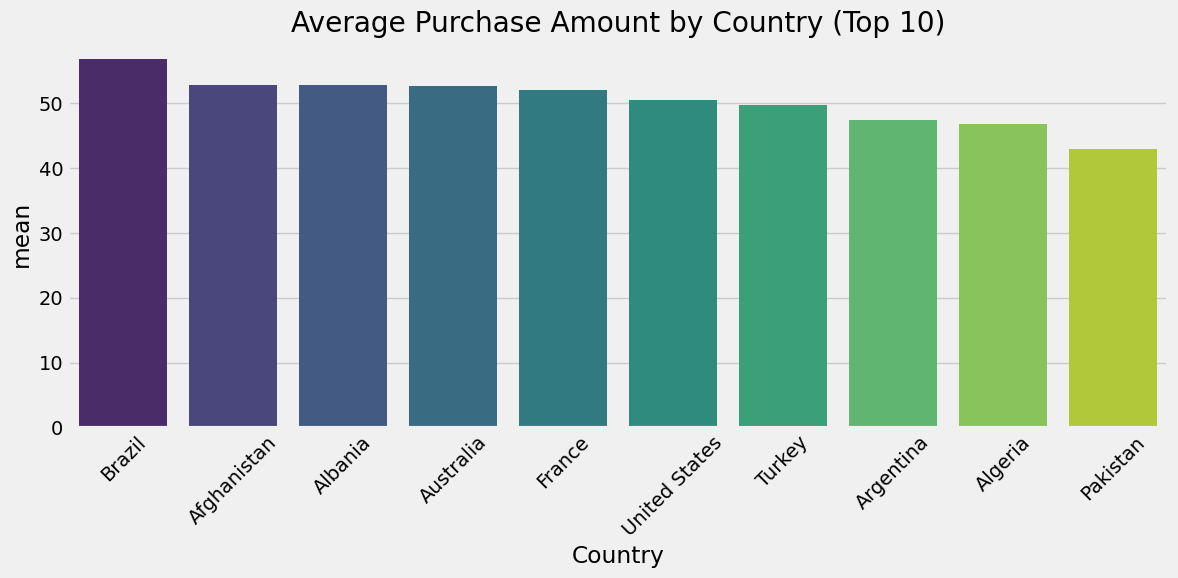

In [40]:
 # Geographic Analysis: Top 10 countries by average purchase amount
country_stats = df.groupby('Country')['Purchase Amount'].agg(['mean', 'count']).sort_values('mean', ascending=False)

# Convert the Series to a DataFrame for easier plotting 
country_stats_df = country_stats.reset_index() 
plt.figure(figsize=(12, 6)) 
sns.barplot(x='Country', y='mean', data=country_stats_df.head(10), palette='viridis')
plt.title('Average Purchase Amount by Country (Top 10)') 
plt.xticks(rotation=45) 
plt.tight_layout()
plt.show()

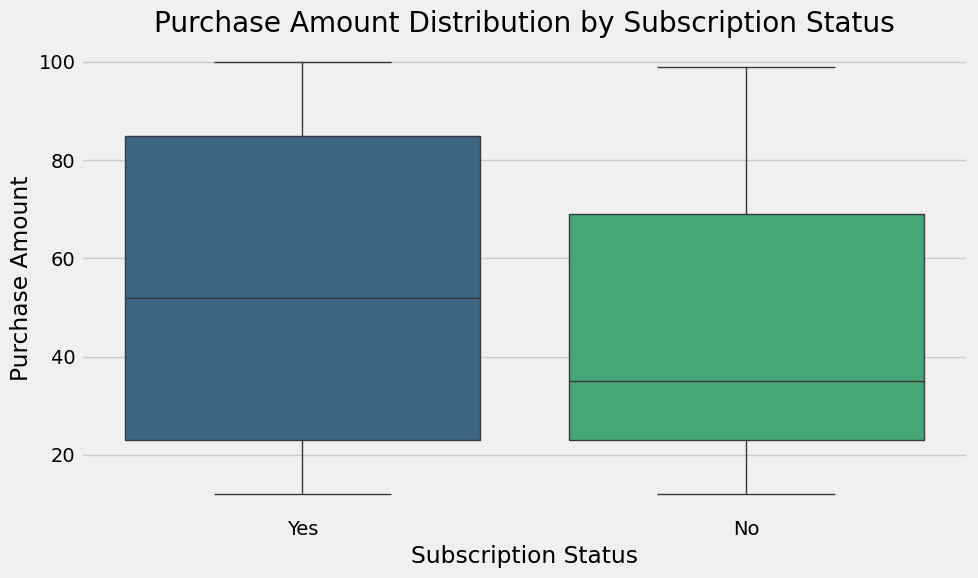

In [41]:
 # Purchase amount distribution by subscription status
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Subscription Status', y='Purchase Amount', palette='viridis')
plt.title('Purchase Amount Distribution by Subscription Status')
plt.tight_layout()
plt.show()   

In [42]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Items Purchased', 'Category',
       'Purchase Amount', 'Shipping Type', 'Subscription Status', 'Season',
       'Country', 'Age_Group'],
      dtype='object')

In [43]:
shipping_type_counts = df['Shipping Type'].value_counts()

shipping_type_counts

Shipping Type
Next Day Air      811
Free Shipping     708
Express           356
2-Day Shipping     66
Name: count, dtype: int64

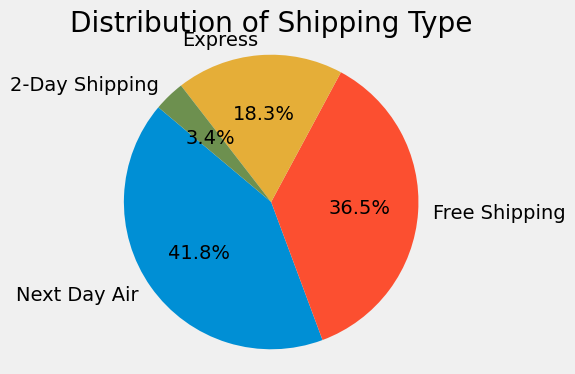

In [44]:
# Shipping Type Distribution
plt.figure(figsize=(5, 4))
plt.pie(shipping_type_counts, labels=shipping_type_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Shipping Type') 
plt.axis('equal')  
plt.show()

In [45]:
# Age-Purchase correlation
age_purchase_corr = df['Age'].corr(df['Purchase Amount'])

age_purchase_corr

-0.002173785271321636

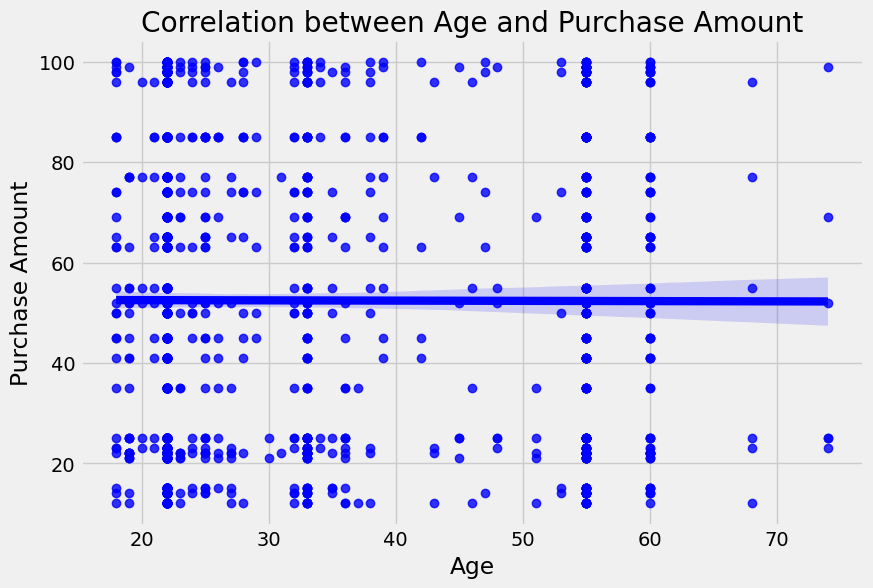

In [46]:
# Plotting the scatter plot with regression line 
plt.figure(figsize=(9, 6)) 
sns.regplot(x='Age', y='Purchase Amount', data=df, color='blue')
plt.title('Correlation between Age and Purchase Amount') 
plt.xlabel('Age') 
plt.ylabel('Purchase Amount') 
plt.show()

In [47]:
# Most Popular Category 
popular_category = df['Category'].value_counts().index[0]

popular_category

'Clothing'

# Machine Learning Model 

In [49]:
from sklearn.model_selection import train_test_split

In [50]:
# Data Preprocessing (convert categorical variables to numerical)
df['Gender'] = df['Gender'].map({'Male': 0, 'Female': 1}) 
df['Subscription Status'] = df['Subscription Status'].map({'No': 0, 'Yes': 1})

In [51]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Items Purchased', 'Category',
       'Purchase Amount', 'Shipping Type', 'Subscription Status', 'Season',
       'Country', 'Age_Group'],
      dtype='object')

In [52]:
X = df[['Gender', 'Age', 'Purchase Amount']]
y = df['Subscription Status']

In [53]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.4, random_state=101)

In [54]:
from sklearn.linear_model import LinearRegression 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import accuracy_score

In [55]:
lm = LinearRegression()

In [56]:
lm.fit(X_train, y_train)

LinearRegression()

In [57]:
print(lm.intercept_)

0.7135131105285775


In [58]:
lm.coef_

array([-1.68316115e-02,  8.92157929e-05,  1.40691588e-03])

In [59]:
X_train.columns

Index(['Gender', 'Age', 'Purchase Amount'], dtype='object')

In [60]:
cdf = pd.DataFrame(lm.coef_, X.columns, columns=['Coeff'])
cdf                  

,Coeff
Gender,-0.016832
Age,0.000089
Purchase Amount,0.001407


# Predictions 

In [62]:
predictions = lm.predict(X_test)

predictions

array([0.77315941, 0.73381714, 0.79107515, 0.74783492, 0.85616745,
       0.7478863 , 0.71834107, 0.83792892, 0.71552724, 0.73057777,
       0.79572144, 0.83792892, 0.76872239, 0.73720734, 0.77180387,
       0.80275602, 0.79670282, 0.7381168 , 0.73381714, 0.77878707,
       0.71974798, 0.84087304, 0.79285623, 0.76347213, 0.77878707,
       0.76445027, 0.7185195 , 0.73530297, 0.7930379 , 0.74774571,
       0.7295964 , 0.76471791, 0.83616514, 0.73676126, 0.836522  ,
       0.83897897, 0.78582165, 0.7365796 , 0.77385584, 0.75083042,
       0.73157968, 0.73381714, 0.77602462, 0.74642801, 0.74796521,
       0.72818948, 0.73381714, 0.76480713, 0.79572144, 0.74937213,
       0.72818948, 0.78546479, 0.75064876, 0.76257997, 0.83768181,
       0.80986951, 0.73517268, 0.73517268, 0.73417401, 0.83370817,
       0.8182321 , 0.85476053, 0.71525959, 0.74815395, 0.85770465,
       0.7509164 , 0.7365796 , 0.80570014, 0.74642801, 0.83649116,
       0.75064876, 0.73381714, 0.83933583, 0.75083042, 0.78826

In [63]:
y_test

400     1
53      0
614     1
1775    1
58      1
       ..
1839    1
1595    1
1902    1
1207    1
1836    1
Name: Subscription Status, Length: 777, dtype: int64

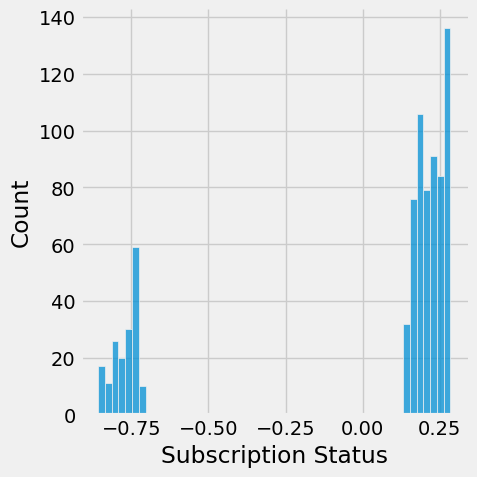

In [64]:
sns.displot((y_test-predictions))

In [65]:
# Train the model 
clf = DecisionTreeClassifier() 
clf.fit(X_train, y_train)

DecisionTreeClassifier()

In [66]:
# Make predictions 
y_pred = clf.predict(X_test)

In [67]:
# Evaluate the model 
accuracy = accuracy_score(y_test, y_pred)

print(f"Accuracy: {accuracy}")

Accuracy: 0.7348777348777349
